In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
#**1、读取数据：信用卡交易数据.xlsx查看前5行(3分)
data = pd.read_excel("信用卡交易数据.xlsx")
data.head()

,换设备次数,支付失败次数,换IP次数,换IP国次数,交易金额,欺诈标签
0,0,11,3,5,28836,1
1,5,6,1,4,21966,1
2,6,2,0,0,18199,1
3,5,8,2,2,24803,1
4,7,10,5,0,26277,1


In [7]:
#**2、特征清洗及预处理，并划分测试集与训练集(5分)
from sklearn.model_selection import train_test_split
print(data.isnull().sum())
#** 没有空值 将重复数据删除
data.drop_duplicates(inplace=True)
X = data.iloc[:,0:5]
y = data["欺诈标签"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

换设备次数     0
支付失败次数    0
换IP次数     0
换IP国次数    0
交易金额      0
欺诈标签      0
dtype: int64


In [8]:
#**3、自主选择2种算法对样本进行模型训练(10分)
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lr = LogisticRegression(max_iter=1000,C=1.0, fit_intercept=True,penalty='l2')
#*训练模型 
lr.fit(X_train,y_train)

tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,min_samples_leaf=1)

tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
#**4、对选择的2个算法进行参数调优(10分)
# **使用网格搜索 
from sklearn.model_selection import GridSearchCV

lr_parameters = {'max_iter':[100,200,300], 'C':[0.01,0.1,1.0,10.0],'fit_intercept':[True,False]}
svc = lr
lr_grid = GridSearchCV(svc, lr_parameters,cv=5)
#**拟合模型 
lr_grid.fit(X_train,y_train)
#**获取最优模型 
lr_best_model = lr_grid.best_estimator_
print(lr_best_model)

tree_parameters = {'splitter':['best','random'], 'max_depth':[7,8,9],'min_samples_leaf':[1,2,3]}
svc = tree
tree_grid = GridSearchCV(svc, tree_parameters,cv=5)
#**拟合模型 
tree_grid.fit(X_train,y_train)
#**获取最优模型 
tree_best_model = tree_grid.best_estimator_
print(tree_best_model)

E:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:

LogisticRegression(C=0.01, max_iter=200)
DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)


In [10]:
#**5、自主选择至少2种指标进行模型评估(6分)
# ** 使用 准确率 和 召回率 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
# ** 对测试数据 进行 预测 
tree_model_pred = tree_best_model.predict(X_test)
lr_model_pred = lr_best_model.predict(X_test)
#**决策树 
tree_acc = accuracy_score(y_test,tree_model_pred)
tree_recall = recall_score(y_test,tree_model_pred)

print(f"决策树准确率{tree_acc},召回率{tree_recall}")

#** 逻辑回归 
lr_acc = accuracy_score(y_test,lr_model_pred)
lr_recall = recall_score(y_test,lr_model_pred)

print(f"逻辑回归准确率{lr_acc},召回率{lr_recall}")

决策树准确率0.91,召回率0.7901234567901234
逻辑回归准确率0.745,召回率0.5802469135802469


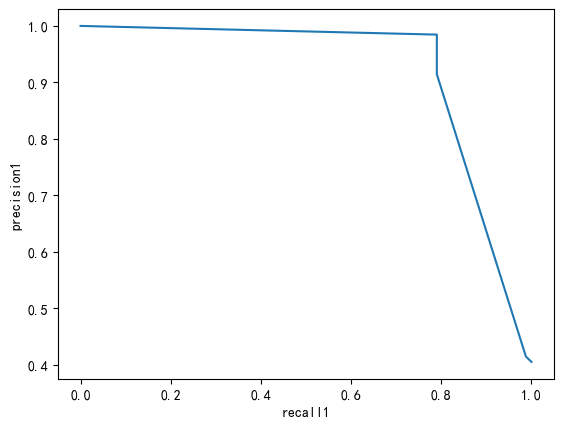

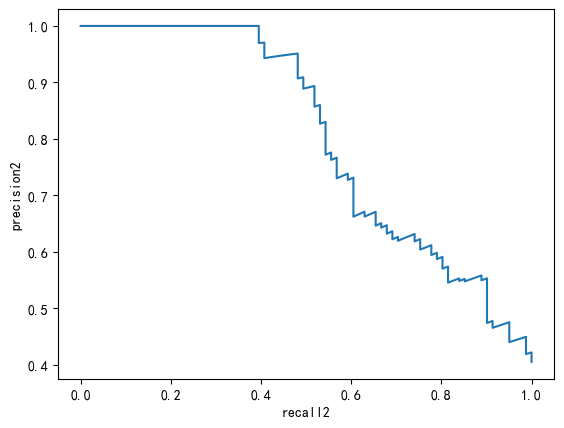

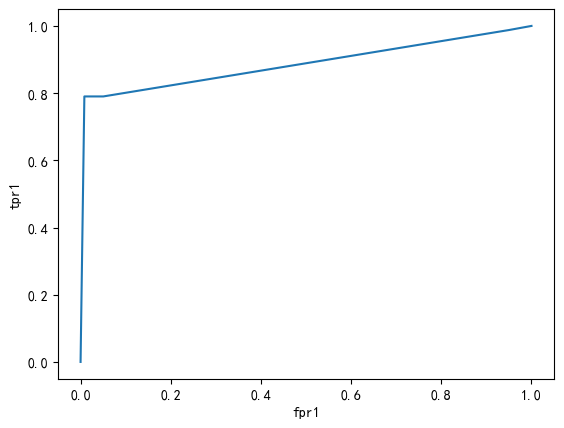

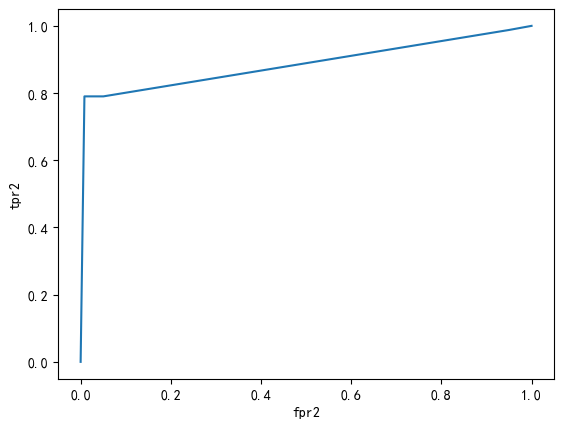

In [17]:
#**6、绘制PR曲线 与ROC曲线来评估模型预测的效果(6分)
from sklearn.metrics import roc_curve,precision_recall_curve
tree_proba = tree_best_model.predict_proba(X_test)
lr_proba = lr_best_model.predict_proba(X_test)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, tree_proba[:,1])
precision2, recall2, thresholds2 = precision_recall_curve(y_test, lr_proba[:,1])
plt.plot(recall1,precision1)
plt.xlabel("recall1")
plt.ylabel("precision1")
plt.show()
plt.plot(recall2,precision2)
plt.xlabel("recall2")
plt.ylabel("precision2")
plt.show()
fpr1, tpr1, _ = roc_curve(y_test, tree_proba[:,1])
fpr2, tpr2, _ = roc_curve(y_test, tree_proba[:,1])
plt.plot(fpr1,tpr1)
plt.xlabel("fpr1")
plt.ylabel("tpr1")
plt.show()
plt.plot(fpr2,tpr2)
plt.xlabel("fpr2")
plt.ylabel("tpr2")
plt.show()

In [18]:
#**7、输出特征重要性及预测结果(5分)
print(lr_model_pred)
print(tree_model_pred)
print(tree_best_model.feature_importances_)
print(lr_best_model.coef_)

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1]
[0.38643621 0.21996368 0.05584418 0.31376889 0.02398704]
[[ 3.35635353e-01  1.75853879e-01  7.98722810e-02  4.65201247e-01
  -1.49752444e-05]]
